In [1]:
import numpy as np
from numpy import sqrt, log
import random
import matplotlib.pyplot as plt

In [2]:
directory='/Users/julnow/Desktop/szkoła/KMS/1/'
params = directory + 'params.txt'

lab 1

In [3]:
#read variables
variables = {}
with open(params) as f:
    for line in f:
        name, value = line.split(" = ")
        variables[name] = float(value)
n = int(variables['n'])
a = variables['a']
L = variables['L']
T =  variables['T']
R =  variables['R']
k = 8.31e-3 # Boltzman const
m = variables['m'] * 1.6605402e-27 # 1u
eps = 1
#kryształ
#(3)
N = n**3 
# (4)
b0 = np.array([a, 0, 0])
b1 = np.array([a/2, a*sqrt(3)/2, 0])
b2 = np.array([a/2, a*sqrt(3)/6, a*sqrt(2/3)])
# (5)
ri= np.zeros([3, N])
for i0 in range(n):
    for i1 in range(n):
        for i2 in range(n):
            i = i0 + i1 * n + i2 * n**2
            r = (i0 - (n-1)/2)*b0 +  (i1- (n-1)/2)*b1 + (i2 - (n-1)/2)*b2
            ri[:,i] = r
# (6)
ei= np.zeros([3, N])
const = - k * T /2
for i in range(1, N+1):
    x = const*log(random.uniform(0, 1))
    y = const*log(random.uniform(0, 1))
    z = const*log(random.uniform(0, 1))
    ei[:,i-1] = np.array([x, y, z])
# (7)
pi= np.zeros([3, N])
for i in range(1, N+1):
    x = sqrt(2*m*ei[0, i-1])
    if (random.uniform(0, 1) < .5):
        x *= -1
    y = sqrt(2*m*ei[1, i-1])
    if (random.uniform(0, 1) < .5):
        y *= -1
    z = sqrt(2*m*ei[2, i-1])
    if (random.uniform(0, 1) < .5):
        z *= -1
    pi[:,i-1] = np.array([x, y, z])
# (8)
Px = sum(pi[0,:])
Py = sum(pi[1,:])
Pz = sum(pi[2,:])
for i in range(N):
    pi[0,i] -= Px/N
    pi[1,i] -= Py/N
    pi[2,i] -= Pz/N

lab 2

In [4]:
def vector_average(array): # | r | 
    return sqrt(np.sum (np.square(array)))
# (9)
Vp = np.zeros([N, N])
Fi = np.zeros([3, N]) # (12)
for i in range (N):
    for j in range(i, N):
        if (i != j):
            ri_rj = ri[:,i] - ri[:,j] # x, y, z difference
            r = vector_average(ri_rj) #sum of squares of x,y,z differences
            vp_ij = eps*( pow((R/r), 12) - 2* pow((R/r),6) )
            Vp[i, j] = vp_ij
            Fi[:, i] += 12* vp_ij * ri_rj / r**2 # (13)
f = 10e4
# (10)
Vs = np.zeros([N])
P = np.zeros([3]) # (15)
for i in range (N):
    r = vector_average(ri[:,i])
    if (r < L):
        Vs[i] = 0
    else:
        Vs[i] = f*pow((r-L),2)/2
        Fi[:, i] += f*(L-r) * (ri[:,i] / r) # (14)
        P += Fi[:, i] / 4/ 3.14 / L**2 # (15)
# (11)
V = np.sum(Vs) + np.sum(Vp)
print ('V = ' + str(V))
print ('P = ' + str(P))

V = -669.2932036253529
P = [0. 0. 0.]


In [5]:
# (16)
H = 0 #hamiltionian
for i in range(N):
    p = vector_average(pi[:, i])
    H += p**2 /2/m
H += V

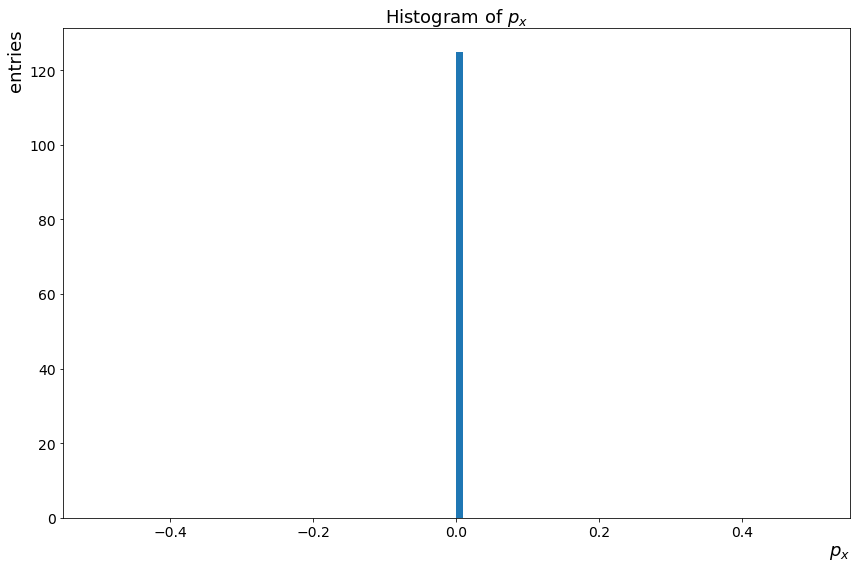

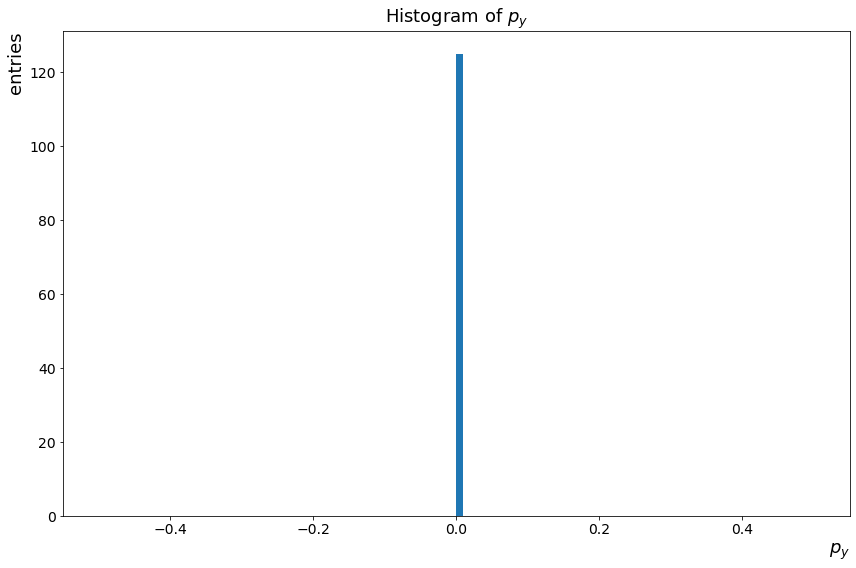

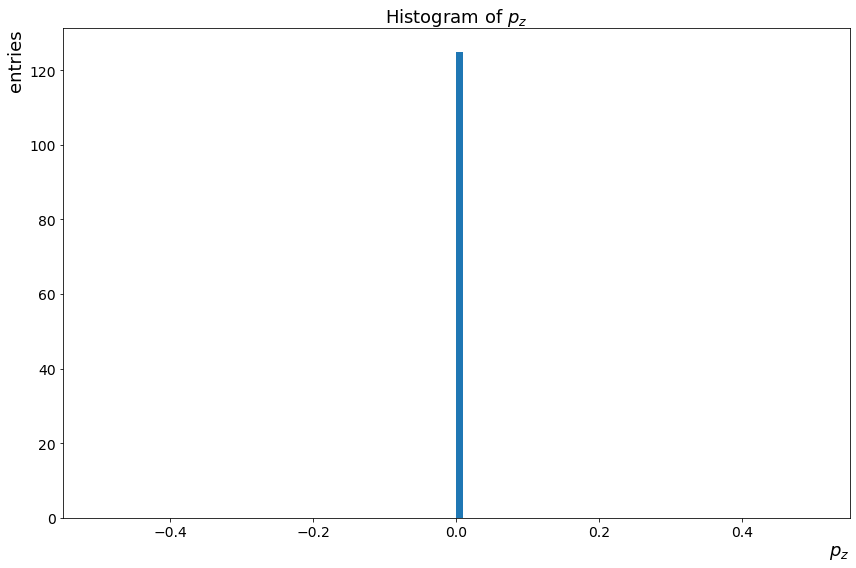

In [6]:
#plot histograms for momenta
coords = ['x', 'y', 'z']
count = 0
for coord in coords:
    fig, ax = plt.subplots(figsize=(12,8))
    name = r'$p_{' + coord + r'}$'
    plt.title(r'Histogram of ' + name , fontsize=18)
    plt.xlabel(name, fontsize=18, loc='right')
    plt.ylabel("entries", fontsize=18, loc='top')
    #plt.yscale('log')
    plt.hist(pi[count, :], bins=100)
    ax.tick_params(axis='both', which='major', labelsize=14)
    fig.tight_layout()
    count += 1

In [7]:
#create xyz file with positions
file_xyz = open(directory+'kms1.xyz',"w+")
file_xyz.write(' '+ str(N) + '\n\n')
for i in range(N):
    line = 'Ar' +  ' '
    x = ri[0, i]
    y = ri[1, i]
    z = ri[2, i]
    line += ' ' + str(x) + ' ' + str(y) + ' ' + str(z) + '\n'
    file_xyz.write(line)
file_xyz.close()